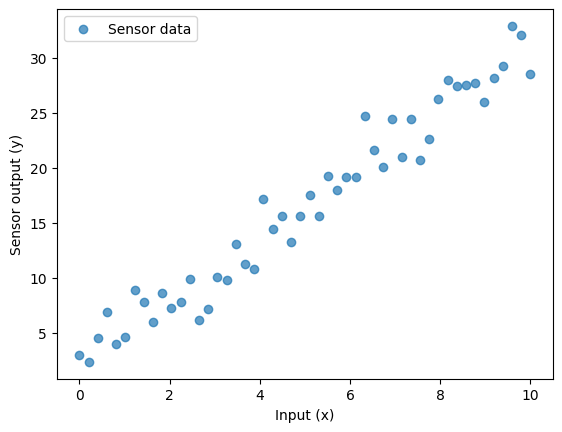

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(0, 10, 50)
noise = np.random.normal(0, 2, size=x.shape)
y = 3 * x + 2 + noise

plt.scatter(x, y, label="Sensor data", alpha=0.7)
plt.xlabel("Input (x)")
plt.ylabel("Sensor output (y)")
plt.legend()
plt.show()


In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
print(model.coef_, model.intercept_)


ModuleNotFoundError: No module named 'sklearn'

In [3]:
import pymc as pm

with pm.Model() as bayes_model:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value
    mu = alpha + beta * x

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Posterior sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.9, random_seed=42)
 

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

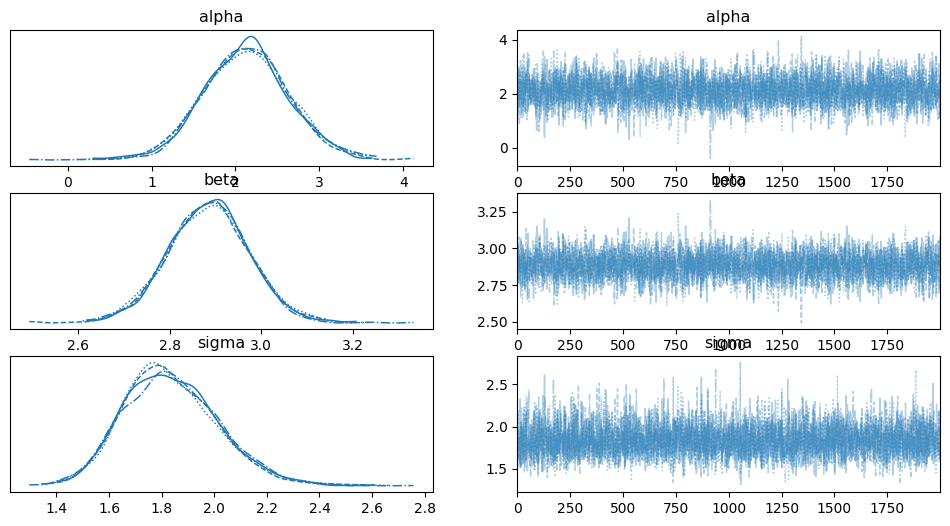

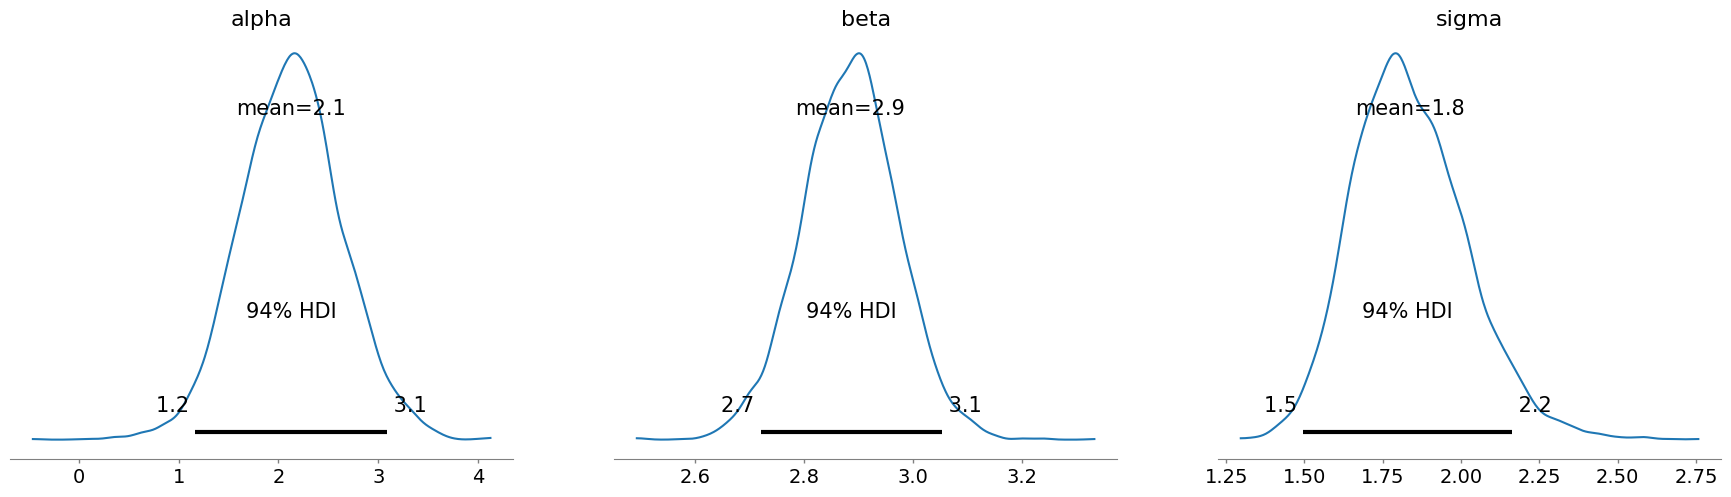

In [4]:
pm.plot_trace(trace)
pm.plot_posterior(trace)


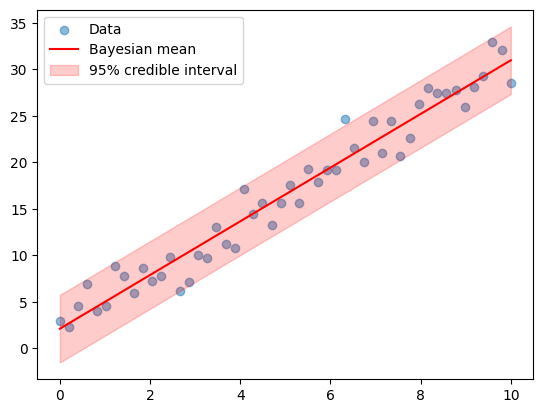

In [5]:
alpha_post = trace.posterior["alpha"].mean().item()
beta_post = trace.posterior["beta"].mean().item()

y_pred = alpha_post + beta_post * x
plt.scatter(x, y, alpha=0.5, label="Data")
plt.plot(x, y_pred, color='red', label="Bayesian mean")
plt.fill_between(
    x,
    y_pred - 2*np.std(y - y_pred),
    y_pred + 2*np.std(y - y_pred),
    color='red', alpha=0.2, label="95% credible interval"
)
plt.legend()
plt.show()
